# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = 'data/train.p'
validation_file='data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Show number of training/validation/testing examples
# and number of classes
import numpy as np

assert np.shape(X_train)[0] == np.shape(y_train)[0], "# of train examples must equal # of train labels"
n_train = np.shape(X_train)[0]

assert np.shape(X_valid)[0] == np.shape(y_valid)[0], "# of valid examples must equal # of valid labels"
n_valid = np.shape(X_valid)[0]

assert np.shape(X_test)[0] == np.shape(y_test)[0], "# of test examples must equal # of test labels"
n_test = np.shape(X_test)[0]

image_shape = np.shape(X_test)[1:]

classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
# Load class names and print out
# the mapping from integer ID to sign name
import pandas as pd
sign_names = pd.read_csv('signnames.csv')
print('Sign Names\n%s\n' % sign_names.to_string(index=False))

Sign Names
ClassId                                           SignName
      0                               Speed limit (20km/h)
      1                               Speed limit (30km/h)
      2                               Speed limit (50km/h)
      3                               Speed limit (60km/h)
      4                               Speed limit (70km/h)
      5                               Speed limit (80km/h)
      6                        End of speed limit (80km/h)
      7                              Speed limit (100km/h)
      8                              Speed limit (120km/h)
      9                                         No passing
     10       No passing for vehicles over 3.5 metric tons
     11              Right-of-way at the next intersection
     12                                      Priority road
     13                                              Yield
     14                                               Stop
     15                                      

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook
%matplotlib inline

# show a bunch of images for every class in the dataset
def show_examples(X, y, ex_per_class=15, gray=False, seed=42):
    # set seed to show random examples
    np.random.seed(seed)
    for i in range(n_classes):
        # pick a bunch of examples from a given class
        indices = np.squeeze(np.where(y == i))
        np.random.shuffle(indices)
        sign_name = sign_names.iloc[i]['SignName']
        # list class name and number of total examples per class
        print("=====================================================")
        print("Class %i (# examples: %d): %s" % (i, len(indices), sign_name))
        print("=====================================================")
        # show a few images for each class
        for j in range(ex_per_class):     
            img_index = indices[j]
            img = np.squeeze(X[img_index])
            if j == 0:
                plt.figure(figsize=(15,15)) 
            ax = plt.subplot(1, ex_per_class, j + 1)
            if gray:
                plt.imshow(img, cmap='gray')
            else:
                plt.imshow(img)
            if j == (ex_per_class - 1):
                # need to invoke this, otherwise the figure will be overwritten
                # with the next image to be shown
                plt.show()

Class 0 (# examples: 180): Speed limit (20km/h)


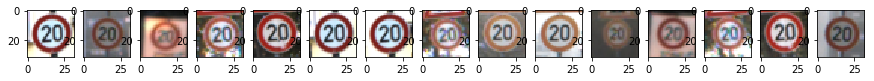

Class 1 (# examples: 1980): Speed limit (30km/h)


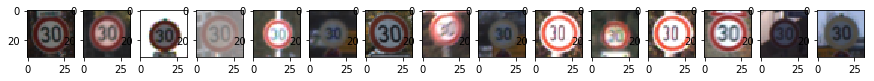

Class 2 (# examples: 2010): Speed limit (50km/h)


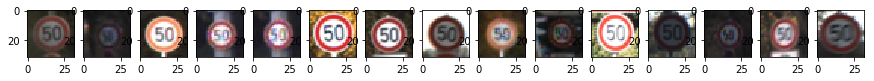

Class 3 (# examples: 1260): Speed limit (60km/h)


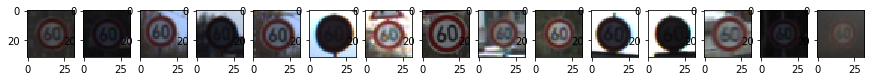

Class 4 (# examples: 1770): Speed limit (70km/h)


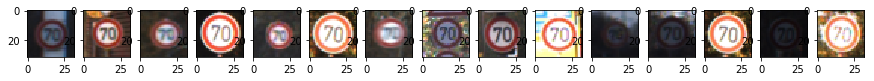

Class 5 (# examples: 1650): Speed limit (80km/h)


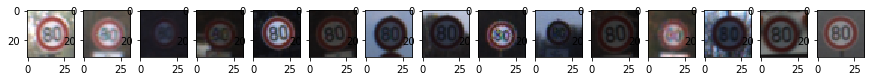

Class 6 (# examples: 360): End of speed limit (80km/h)


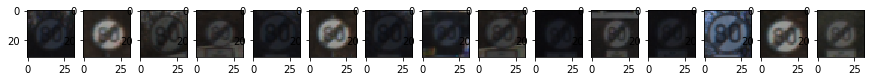

Class 7 (# examples: 1290): Speed limit (100km/h)


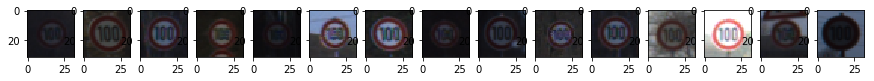

Class 8 (# examples: 1260): Speed limit (120km/h)


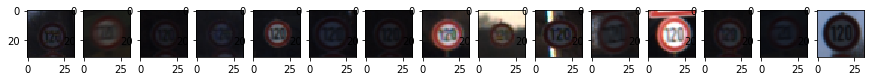

Class 9 (# examples: 1320): No passing


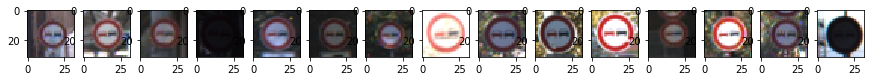

Class 10 (# examples: 1800): No passing for vehicles over 3.5 metric tons


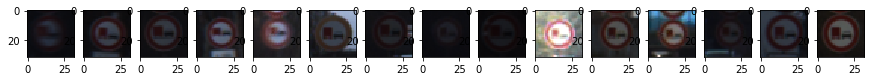

Class 11 (# examples: 1170): Right-of-way at the next intersection


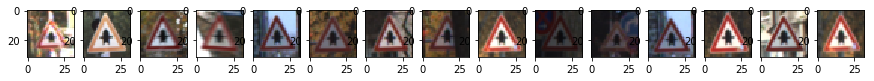

Class 12 (# examples: 1890): Priority road


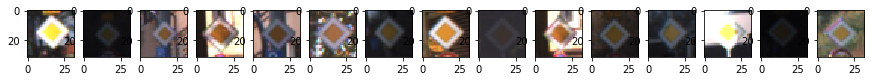

Class 13 (# examples: 1920): Yield


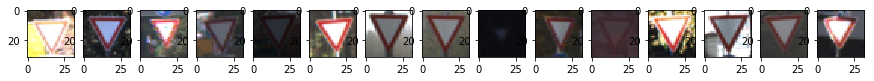

Class 14 (# examples: 690): Stop


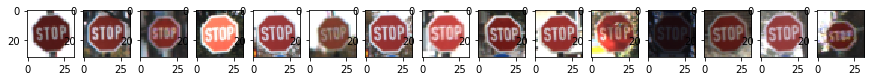

Class 15 (# examples: 540): No vehicles


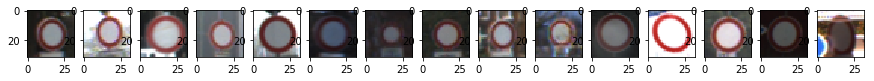

Class 16 (# examples: 360): Vehicles over 3.5 metric tons prohibited


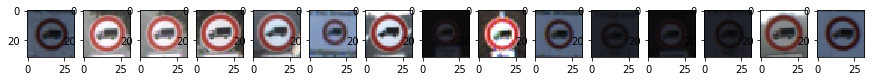

Class 17 (# examples: 990): No entry


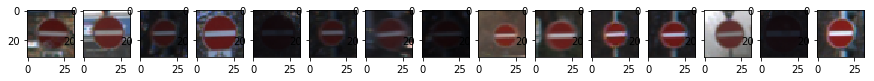

Class 18 (# examples: 1080): General caution


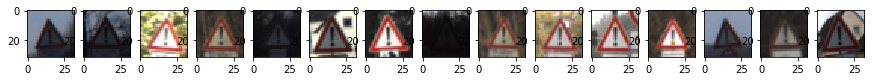

Class 19 (# examples: 180): Dangerous curve to the left


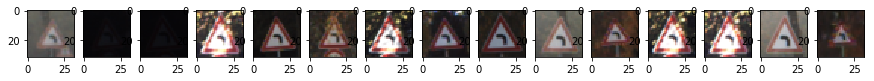

Class 20 (# examples: 300): Dangerous curve to the right


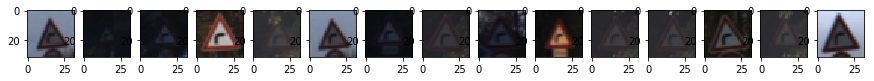

Class 21 (# examples: 270): Double curve


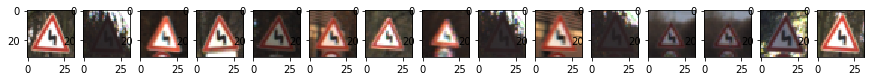

Class 22 (# examples: 330): Bumpy road


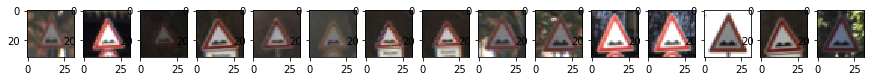

Class 23 (# examples: 450): Slippery road


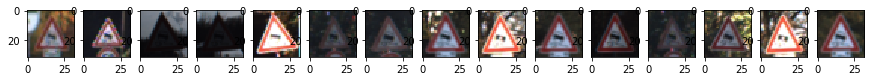

Class 24 (# examples: 240): Road narrows on the right


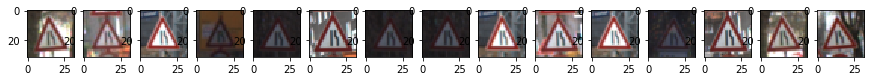

Class 25 (# examples: 1350): Road work


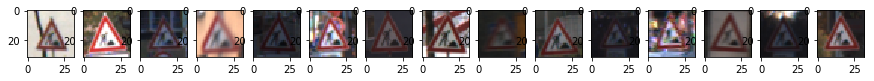

Class 26 (# examples: 540): Traffic signals


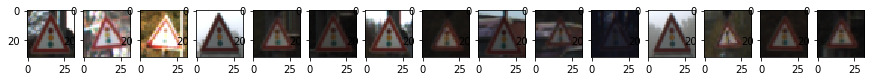

Class 27 (# examples: 210): Pedestrians


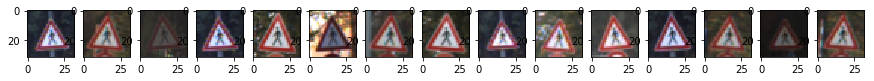

Class 28 (# examples: 480): Children crossing


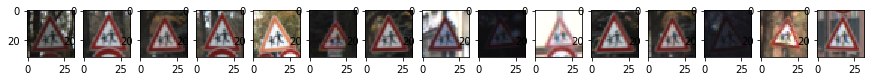

Class 29 (# examples: 240): Bicycles crossing


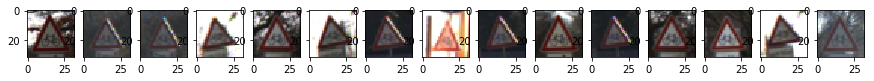

Class 30 (# examples: 390): Beware of ice/snow


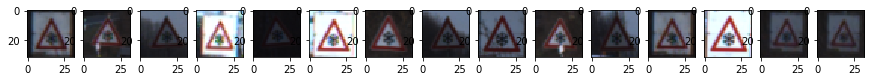

Class 31 (# examples: 690): Wild animals crossing


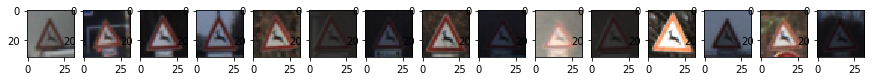

Class 32 (# examples: 210): End of all speed and passing limits


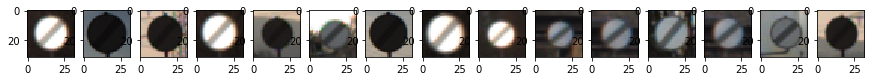

Class 33 (# examples: 599): Turn right ahead


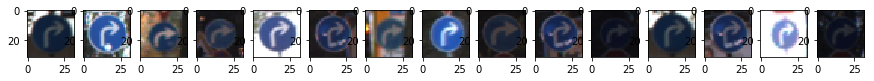

Class 34 (# examples: 360): Turn left ahead


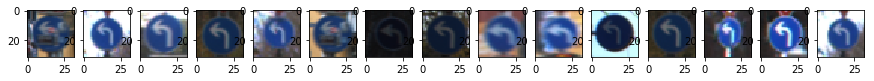

Class 35 (# examples: 1080): Ahead only


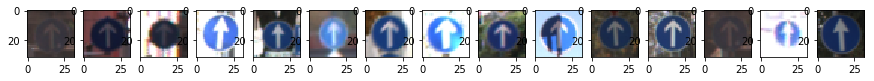

Class 36 (# examples: 330): Go straight or right


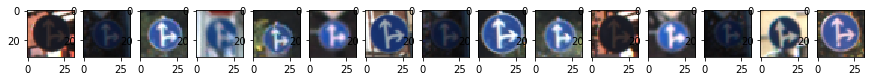

Class 37 (# examples: 180): Go straight or left


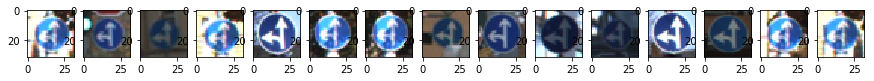

Class 38 (# examples: 1860): Keep right


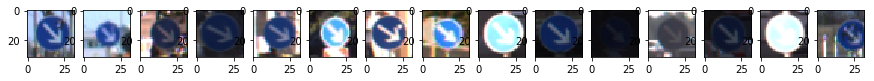

Class 39 (# examples: 270): Keep left


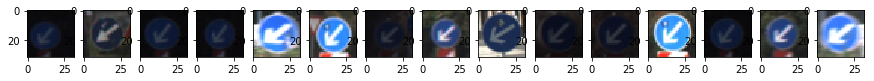

Class 40 (# examples: 300): Roundabout mandatory


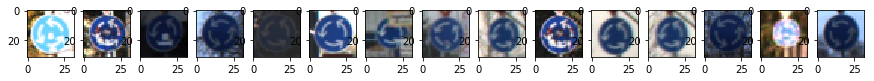

Class 41 (# examples: 210): End of no passing


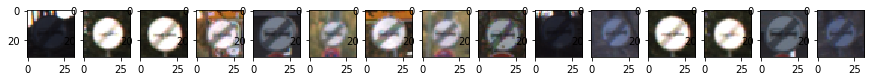

Class 42 (# examples: 210): End of no passing by vehicles over 3.5 metric tons


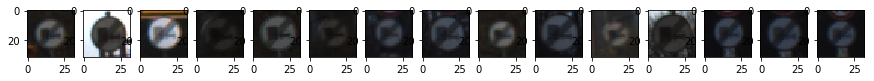

In [5]:
# Note the original images have unequal contrast/brightness
# We'll need to normalize them to train a better model
show_examples(X_train, y_train)

In [6]:
# Plot a bar chart of class IDs and associated
# counts. This will help us find out if the 
# dataset is balanced.
def plot_class_counts(counts):
    plt.figure(figsize=(10, 10)) 
    uniques = np.size(np.unique(y_train))
    plt.bar(np.arange(uniques), counts, align='center')
    plt.xlabel('Class')
    plt.ylabel('Number of training examples')
    plt.xlim([-1, uniques])
    plt.title('Example counts per class ID')
    plt.show()

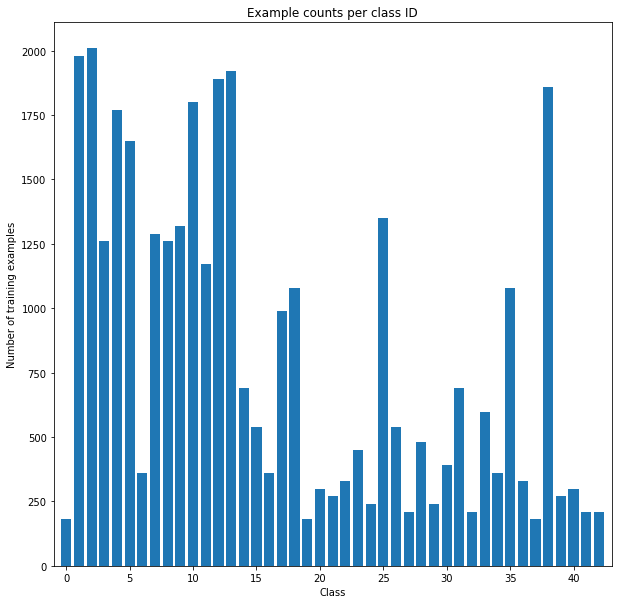

In [7]:
# The dataset is highly unbalanced. Some classes
# have about 180 examples while others have about
# 2,000. We'll balance the dataset later by
# oversampling rare classes.
plot_class_counts(class_counts)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.


### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import skimage
from skimage.transform import rotate
from skimage import exposure, data, color
from skimage.exposure import equalize_hist, equalize_adapthist
from skimage.transform import rotate

# These functions perform data augmentation. The dataset
# isn't large, so performing random hue/saturation
# adjustments within a small range effectively grows the
# dataset and improves generalization. A model that is sensitive
# to shapes but not to lighting conditions, for instance,
# will generalize better. The same goes for slight rotations
# of the image. We will use these functions shortly.

def random_hue_adjust(img, max_delta_ratio=0.05):
    img_hsv = color.rgb2hsv(img)
    max_hue = np.max(img_hsv[...,0])
    min_hue = np.min(img_hsv[...,0])
    hue_range = max_hue - min_hue
    plus_minus = max_delta_ratio*hue_range
    delta = np.random.uniform(-plus_minus, plus_minus)
    img_hsv[...,0] += delta
    return (color.hsv2rgb(img_hsv) * 255).astype(np.uint8)

def random_saturation_adjust(img, max_delta_ratio=0.05):
    img_hsv = color.rgb2hsv(img)
    max_sat = np.max(img_hsv[...,1])
    min_sat = np.min(img_hsv[...,1])
    sat_range = max_sat - min_sat
    plus_minus = max_delta_ratio*sat_range
    delta = np.random.uniform(-plus_minus, plus_minus)
    img_hsv[...,1] += delta
    return (color.hsv2rgb(img_hsv) * 255).astype(np.uint8)

def random_rotate(img, max_degrees=20, mode = 'symmetric'):
    delta = np.random.randint(2 * max_degrees) - max_degrees
    return skimage.transform.rotate(img, delta, mode=mode)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# This function applies histogram equalization to
# "normalize" the contrast and brightness. As we
# saw in the images from the original dataset, the
# contrast and brightness varied greatly in the
# original images.
def equalize(arr, per_channel=True):
    num_img = np.shape(arr)[0]
    new_arr = np.zeros_like(arr)
    for idx in range(num_img):
        if per_channel:
            for c in range(3):
                new_arr[idx,:,:,c] = equalize_hist(arr[idx,:,:,c]) * 255
        else:
            new_arr[idx,...] = equalize_hist(arr[idx,...]) * 255
    return new_arr

Class 0 (# examples: 180): Speed limit (20km/h)


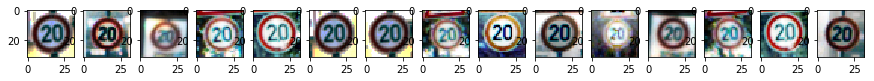

Class 1 (# examples: 1980): Speed limit (30km/h)


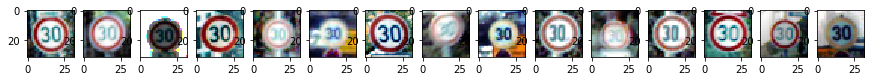

Class 2 (# examples: 2010): Speed limit (50km/h)


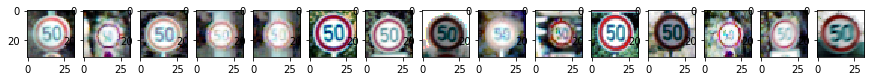

Class 3 (# examples: 1260): Speed limit (60km/h)


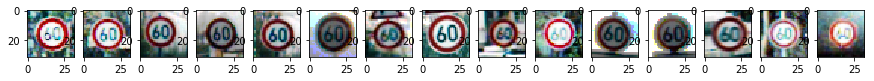

Class 4 (# examples: 1770): Speed limit (70km/h)


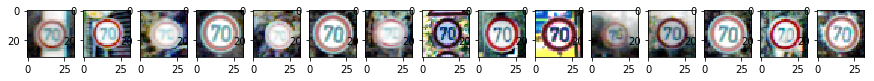

Class 5 (# examples: 1650): Speed limit (80km/h)


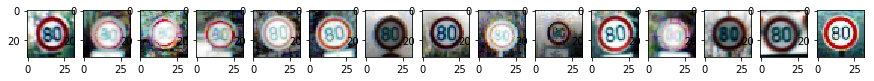

Class 6 (# examples: 360): End of speed limit (80km/h)


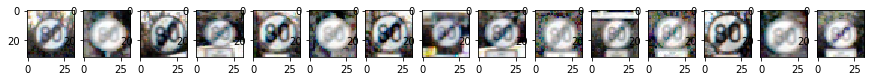

Class 7 (# examples: 1290): Speed limit (100km/h)


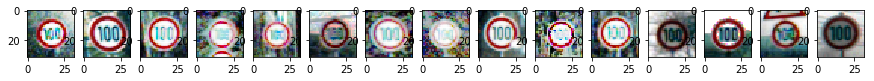

Class 8 (# examples: 1260): Speed limit (120km/h)


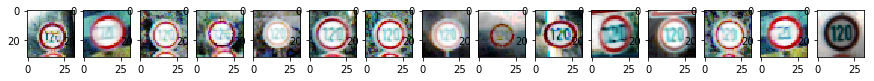

Class 9 (# examples: 1320): No passing


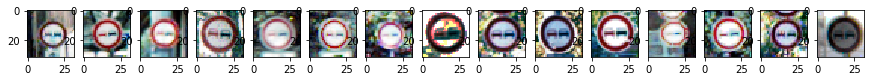

Class 10 (# examples: 1800): No passing for vehicles over 3.5 metric tons


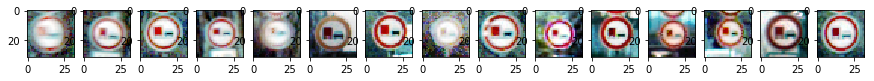

Class 11 (# examples: 1170): Right-of-way at the next intersection


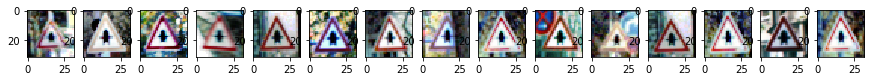

Class 12 (# examples: 1890): Priority road


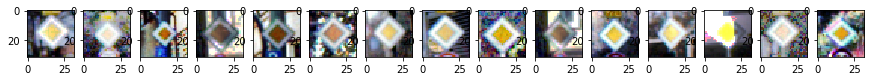

Class 13 (# examples: 1920): Yield


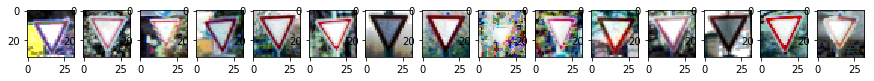

Class 14 (# examples: 690): Stop


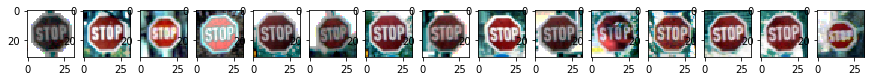

Class 15 (# examples: 540): No vehicles


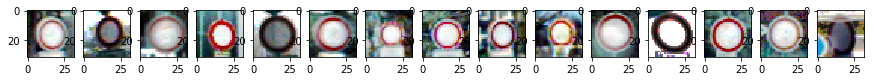

Class 16 (# examples: 360): Vehicles over 3.5 metric tons prohibited


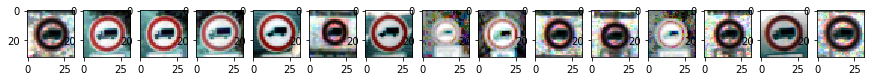

Class 17 (# examples: 990): No entry


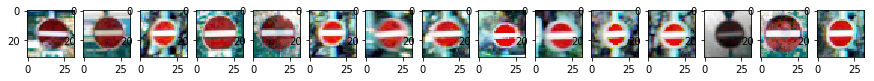

Class 18 (# examples: 1080): General caution


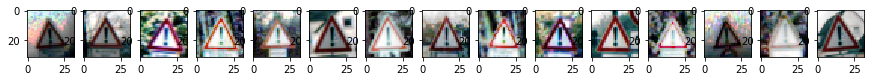

Class 19 (# examples: 180): Dangerous curve to the left


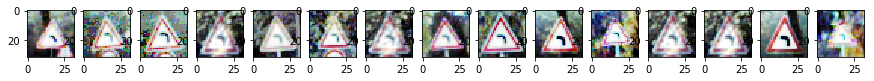

Class 20 (# examples: 300): Dangerous curve to the right


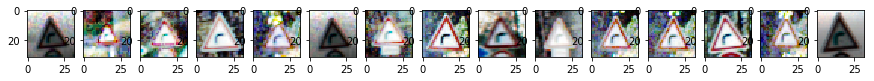

Class 21 (# examples: 270): Double curve


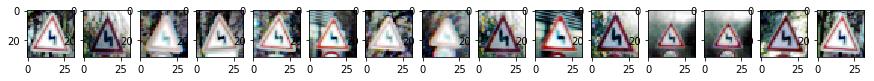

Class 22 (# examples: 330): Bumpy road


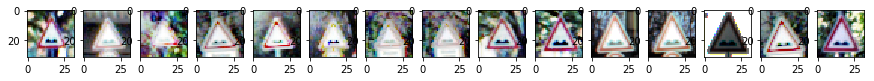

Class 23 (# examples: 450): Slippery road


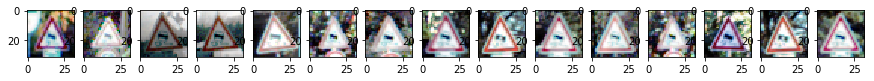

Class 24 (# examples: 240): Road narrows on the right


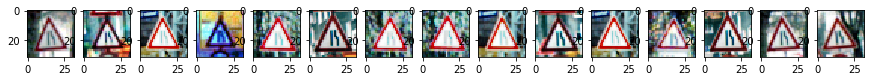

Class 25 (# examples: 1350): Road work


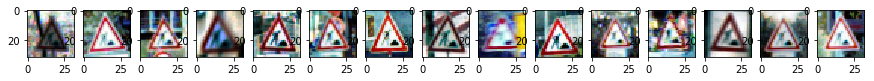

Class 26 (# examples: 540): Traffic signals


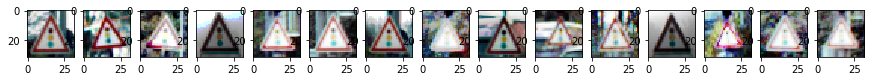

Class 27 (# examples: 210): Pedestrians


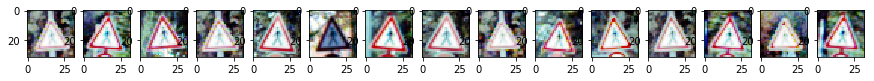

Class 28 (# examples: 480): Children crossing


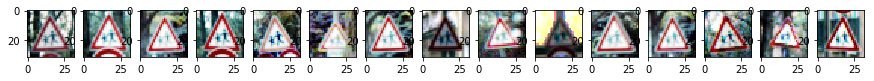

Class 29 (# examples: 240): Bicycles crossing


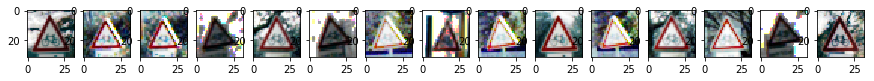

Class 30 (# examples: 390): Beware of ice/snow


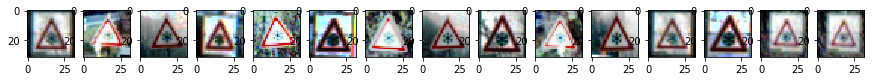

Class 31 (# examples: 690): Wild animals crossing


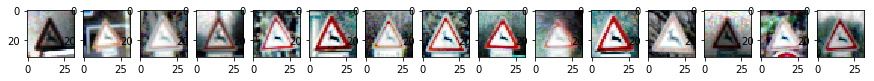

Class 32 (# examples: 210): End of all speed and passing limits


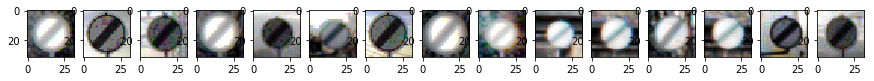

Class 33 (# examples: 599): Turn right ahead


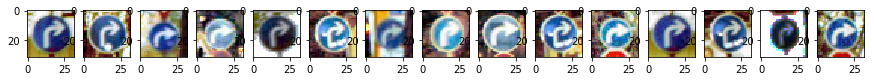

Class 34 (# examples: 360): Turn left ahead


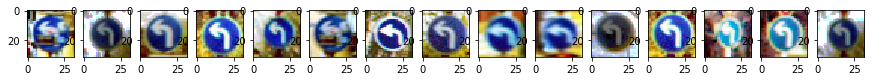

Class 35 (# examples: 1080): Ahead only


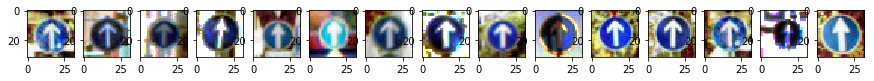

Class 36 (# examples: 330): Go straight or right


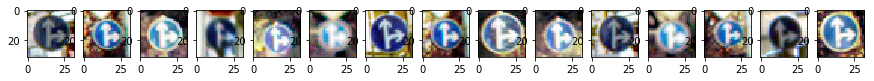

Class 37 (# examples: 180): Go straight or left


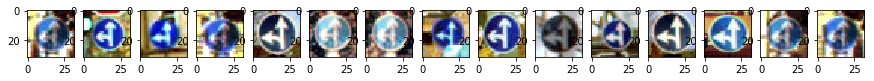

Class 38 (# examples: 1860): Keep right


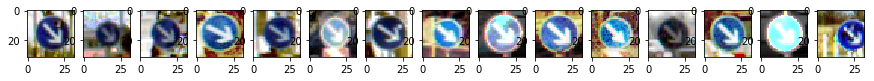

Class 39 (# examples: 270): Keep left


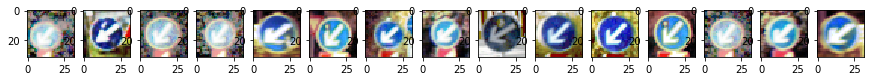

Class 40 (# examples: 300): Roundabout mandatory


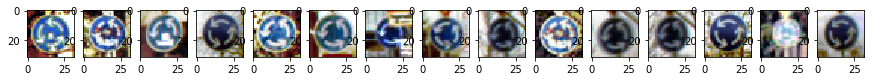

Class 41 (# examples: 210): End of no passing


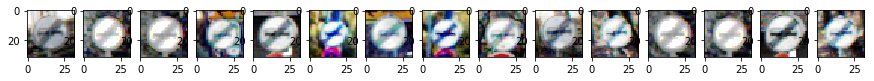

Class 42 (# examples: 210): End of no passing by vehicles over 3.5 metric tons


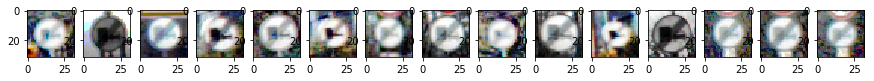

In [9]:
# "Normalize" contrast/brightness using histogram
# I tried both the full-image and adaptive equalizatiton,
# and found that full-image equalization produced 
# better results.
X_train = equalize(X_train, per_channel=True)

# Let's plot the "normalized" examples.
# Note that they look much better.
show_examples(X_train, y_train)

In [10]:
# Since we now know that histogram equalization
# helps, let's apply it to the validation and
# testing datasets.
X_valid = equalize(X_valid, per_channel=True)
X_test = equalize(X_test, per_channel=True)

# Convert the images to float representation
# for TensorFlow.
X_train = X_train.astype(np.float)
X_valid = X_valid.astype(np.float)
X_test = X_test.astype(np.float)

# Let's keep the values in the range [0, 1].
# This will help the model to converge.
X_train /= 255.0
X_valid /= 255.0
X_test /= 255.0

In [11]:
# Let's come back to the unbalanced dataset problem.
# Let's compare the smallest and the largest counts
# of class membership. The ratio of the largest to
# smallest is over 11x. We'll need to create a balanced
# dataset by oversampling the rare classes.
print("number of training examples: %d" % n_train)
max_class_size = np.max(class_counts)
min_class_size = np.min(class_counts)
print("max class size: %s" % (max_class_size))
print("min class size: %s" % (min_class_size))

number of training examples: 34799
max class size: 2010
min class size: 180


In [12]:
# This function samples an equal number of examples
# from each class to create a balanced dataset.
def create_balanced_dataset(features, labels, num_examples_per_class, random_seed=42):
    np.random.seed(random_seed)
    num_classes = np.unique(labels)
    indices = []
    for level in num_classes:
        current_indices = np.where(labels == level)[0]
        indices += np.random.choice(current_indices, size=num_examples_per_class, replace=True).tolist()
    return (features[indices, :], labels[indices])

In [13]:
# Create a balanced dataset by oversampling small classes.
# Since we don't want to lose actual examples, let's set the
# number of examples per class to the number of examples in
# the largest class, i.e. 2010 images.
X_train2, y_train2 = create_balanced_dataset(X_train, y_train, max_class_size)

In [14]:
print("Original dataset dimensions: %s" % str(np.shape(X_train)))
print("Balanced dataset dimensions: %s" % str(np.shape(X_train2)))

Original dataset dimensions: (34799, 32, 32, 3)
Balanced dataset dimensions: (86430, 32, 32, 3)


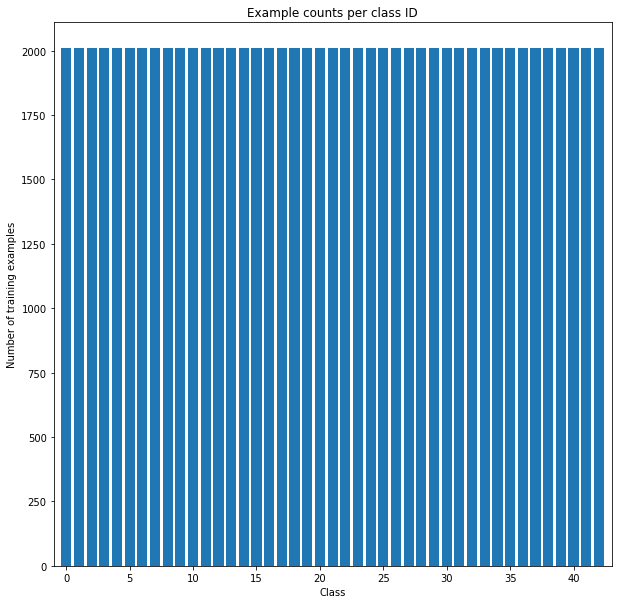

In [15]:
# Let's verify that the dataset is now balanced
# across all classes.
_, _, new_class_counts = np.unique(y_train2, return_index = True, return_counts = True)
plot_class_counts(new_class_counts)

### Model Architecture

In [16]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Let's implement a quasi-Lenet or CIFAR-10 style network.
def TrafficNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines 
    # variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    seed=123

    # first convolutional layer
    conv1_W = tf.Variable(
        tf.truncated_normal(shape=(5, 5, 3, 16), mean = mu,
                            stddev = sigma, name='conv1_W', seed=seed))
    conv1_b = tf.Variable(tf.zeros(16), name='conv1_b')
    conv1   = tf.nn.conv2d(
        x, conv1_W, strides=[1, 1, 1, 1], padding='SAME',name='conv1') + conv1_b
    conv1 = tf.nn.relu(conv1, name='conv1_relu')
    conv1 = tf.nn.max_pool(
        conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='conv1_max_pool')    

    # second convolutional layer
    conv2_W = tf.Variable(
        tf.truncated_normal(shape=(5, 5, 16, 16), mean = mu,
                            stddev = sigma, seed=seed+1), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(
        conv1, conv2_W, strides=[1, 1, 1, 1], padding='SAME', name='conv2') + conv2_b    
    conv2 = tf.nn.relu(conv2, name='conv2_relu')
    conv2 = tf.nn.max_pool(
        conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='conv2_max_pool')

    # flatten output of second convolutional layer
    fc0   = flatten(conv2)

    # first fully-connected layer
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1024, 86), mean = mu, stddev = sigma, seed=seed+2), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(86), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W, name='fc1') + fc1_b
    fc1    = tf.nn.relu(fc1, name='fc1_relu')
    fc1 = tf.nn.dropout(fc1, keep_prob, name='fc1_dropout')
    
    # second fully connected layer that produces
    # the logits for softmax
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(86, 43), mean = mu, stddev = sigma, seed=seed+3), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(43), name='fc2_b')
    logits    = tf.matmul(fc1, fc2_W, name='fc2') + fc2_b
    
    # let's return the logits, as well as the output of
    # the conv1 layer, which we'll use to visualize what
    # the network is learning later on.
    return logits, conv1

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
# Let's instantiate the CNN graph, set up
# the hyperparameters such as the
# learning rate and dropout rate, as
# well as the objective function
# (average cross-entropy) and the optimizer.

rate = 0.001
keep_prob = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
logits, conv1 = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)

loss = tf.reduce_mean(cross_entropy)
loss_operation = tf.reduce_mean(cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [18]:
# Set up a graph for evaluating accuracy,
# add a saver node to checkpoint the model,
# and define an evaluation metric for
# validation data.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Since we already have the image distortion/augmentation
# functions (random saturation, rotation, etc.),
# let's define a helper which will apply the distortion
# to each new batch.

def distort_batch(batch, hue_adjust=True, rotate=True):
    size = np.shape(batch)[0]
    copy = batch.copy()
    for i in range(size):
        if hue_adjust:
            copy[i,...] = random_saturation_adjust(copy[i,...], max_delta_ratio=0.1)
        if rotate:
            copy[i,...] = random_rotate(copy[i,...], max_degrees=20)
    return copy

In [ ]:
# Train the model. Note that after each epoch,
# the data is shuffled. This produces new batches
# for each epoch, and generates more randomness for
# stochastic convergence. This way, the optimization
# will less likely to get stuck than if we repeat
# the same batches over and over for each epoch.

EPOCHS = 30
BATCH_SIZE = 128

from sklearn.utils import shuffle

# Set up the seed to enable reproducibility.
np.random.seed(42)

# X_train, y_train = shuffle(X_train, y_train)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train2, y_train2)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            batch_x = distort_batch(batch_x, hue_adjust=False)
            # Set up dropout for fully-connected layers at 0.5, but
            # the evaluation (inference) will have the "keep probability"
            # at 1.0 (no dropout). See the evaluate() function earlier
            # for the details.
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_net')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.605

EPOCH 2 ...
Validation Accuracy = 0.744

EPOCH 3 ...
Validation Accuracy = 0.808

EPOCH 4 ...
Validation Accuracy = 0.849

EPOCH 5 ...
Validation Accuracy = 0.870

EPOCH 6 ...
Validation Accuracy = 0.878

EPOCH 7 ...
Validation Accuracy = 0.874

EPOCH 8 ...
Validation Accuracy = 0.901

EPOCH 9 ...
Validation Accuracy = 0.903

EPOCH 10 ...
Validation Accuracy = 0.905

EPOCH 11 ...
Validation Accuracy = 0.912

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 13 ...
Validation Accuracy = 0.926

EPOCH 14 ...
Validation Accuracy = 0.931

EPOCH 15 ...
Validation Accuracy = 0.937

EPOCH 16 ...
Validation Accuracy = 0.937

EPOCH 17 ...
Validation Accuracy = 0.939

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.947

EPOCH 20 ...
Validation Accuracy = 0.941

EPOCH 21 ...
Validation Accuracy = 0.949

EPOCH 22 ...
Validation Accuracy = 0.947

EPOCH 23 ...
Validation Accuracy = 0.950

EPOCH 24 ...
Validation Accura

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
# Load some images I downloaded from the internet.
# Keep the original high-resolution images as well
# as the resized (32x32) images.

from matplotlib.image import imread
from PIL import Image

image_files = ['stop_sign.png', 'right_of_way.png', 'road_work.png', 'no_entry.png', 'priority_road.png']

original_images = []
resized_images = []

for file in image_files:
    image = Image.open('new_examples/' + file)
    original_images.append(image)
    image = image.resize((32, 32), Image.BILINEAR)
    resized_images.append(image)

### Predict the Sign Type for Each Image

In [ ]:
# Run the session. Show the original image,
# resized (32x32) image, as well as the
# predicted class for the resized image.
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    for idx, (orig_image, resized_image) in enumerate(zip(original_images, resized_images)):
        file_name = image_files[idx].split('.')[0]
        sign = np.reshape(resized_image, (1, 32, 32, 3))
        prediction = sess.run(tf.nn.softmax(logits), feed_dict={x: sign, keep_prob: 1.0})
        idx = np.argmax(prediction)
        sign_name = sign_names.iloc[idx]['SignName']
        plt.imshow(orig_image)
        plt.title("Original image: %s" % file_name)
        plt.show()
        plt.imshow(resized_image)
        plt.title("Prediction on resized image: %s" % sign_name)
        plt.show()

### Analyze Performance

In [ ]:
# The expected classes were taken by manually
# annotating the images based on the class label
# list shown earlier.
expected_classes = [14, 11, 25, 17, 12]
count_correct = 0

with tf.Session() as sess:
    saver.restore(sess, "./traffic_net")
    for idx, image in enumerate(resized_images):
        print("\nFILE NAME: %s" % image_files[idx])
        sign = np.reshape(image, (1, 32, 32, 3))
        pred = sess.run(tf.nn.softmax(logits), feed_dict={x: sign, keep_prob: 1.0})
        pred = np.argmax(pred)
        print("Predicted class: %s" % sign_names.iloc[pred]['SignName'])
        if pred == expected_classes[idx]:
            count_correct += 1

pct_correct = float(count_correct) / len(expected_classes) * 100
print("\nPercent correct: %.2f" % pct_correct)
        

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
# List the top 5 predictions for each of the images.
with tf.Session() as sess:
    saver.restore(sess, "./traffic_net")
    for idx, image in enumerate(resized_images):
        print("\nFILE NAME: %s" % image_files[idx])
        values, indices = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: sign, keep_prob: 1.0})
        print("TOP PREDICTIONS: ")
        for value, index in zip(values[0], indices[0]):
            print("Class: %20s, Probability: %.2f" % (sign_names.iloc[index]['SignName'], value))

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = sess.run(tf_activation, feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.show()

In [ ]:
# Show the feature maps from the first
# convolutional layer.
with tf.Session() as sess:
    saver.restore(sess, "./traffic_net")
    for idx, image in enumerate(resized_images):
        file_name = image_files[idx].split('.')[0]
        print("Sign: %s" % file_name)
        sign = np.reshape(image, (1, 32, 32, 3))
        outputFeatureMap(sign, conv1)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


Note that the outlines of the various signs can be seen, e.g. the circle and the horizontal bar in the "no entry" sign, or the octagonal shape of the stop sign. Also, each feature map captures something else, e.g. some of the feature maps in the stop sign end up focusing on the "STOP" text, while others "focus" on the octagonal shape and "ignore" the text.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 